In [316]:
# Imports
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns
from sklearn import linear_model

In [305]:
# Maps for numeric fields
sexes = { 'male': 0, 'female': 1 }
honorifics = {
    'Mr' : 1,
    'Don': 2,
    'Sir': 2,
    'Rev': 2,
    'Dr': 2,
    'Major': 2,
    'Col': 2,
    'Capt': 2,
    'Jonkheer': 2,
    'Master': 3,
    'Mlle': 4,
    'Ms': 4,
    'Miss': 4,
    'Mrs': 5,
    'Mme': 5,
    'Dona': 5,
    'Lady': 5,
    'the Countess': 5
}
ticket_prefixes = {
 '': 0,
 'a': 7,
 'a4': 30,
 'a5': 14,
 'aq3': 4,
 'aq4': 35,
 'as': 31,
 'basle': 17,
 'c': 9,
 'ca': 12,
 'casoton': 28,
 'fa': 19,
 'fc': 3,
 'fcc': 6,
 'lp': 25,
 'pc': 20,
 'pp': 29,
 'ppp': 11,
 'sc': 2,
 'sca3': 10,
 'sca4': 21,
 'scah': 24,
 'scow': 23,
 'scparis': 1,
 'soc': 15,
 'sop': 26,
 'sopp': 34,
 'sotono2': 22,
 'sotonoq': 32,
 'sp': 13,
 'stono': 16,
 'stono2': 18,
 'stonoq': 5,
 'swpp': 8,
 'wc': 27,
 'wep': 33,
 'scahbasle': 36,
 'a2': 37
}
#cabins = {'': 0, 'D43': 1, 'B73': 2, 'B78': 3, 'B71': 4, 'B37': 5, 'A23': 6, 'C116': 7, 'A21': 8, 'A10': 9, 'E38': 10, 'B102': 11, 'A24': 12, 'B57 B59 B63 B66': 13, 'C105': 14, 'C55 C57': 15, 'C90': 16, 'D35': 17, 'B30': 18, 'D37': 19, 'E31': 20, 'C97': 21, 'E33': 22, 'C49': 23, 'B101': 24, 'C32': 25, 'A6': 26, 'C103': 27, 'C70': 28, 'B77': 29, 'B19': 30, 'E10': 31, 'B36': 32, 'D15': 33, 'C99': 34, 'F G73': 35, 'E34': 36, 'E68': 37, 'C95': 38, 'A7': 39, 'C110': 40, 'B49': 41, 'D19': 42, 'F33': 43, 'E36': 44, 'D17': 45, 'E50': 46, 'B10': 47, 'C2': 48, 'C125': 49, 'A36': 50, 'E40': 51, 'D30': 52, 'A34': 53, 'B39': 54, 'F': 55, 'C104': 56, 'E63': 57, 'B3': 58, 'C101': 59, 'C53': 60, 'G6': 61, 'E12': 62, 'B79': 63, 'F E46': 64, 'A11': 65, 'E8': 66, 'C68': 67, 'B38': 68, 'E44': 69, 'E24': 70, 'B96 B98': 71, 'E25': 72, 'B82 B84': 73, 'B26': 74, 'E52': 75, 'D21': 76, 'C118': 77, 'C128': 78, 'D': 79, 'D49': 80, 'B24': 81, 'A9': 82, 'B58 B60': 83, 'F G63': 84, 'E45': 85, 'E101': 86, 'C86': 87, 'D7': 88, 'D26': 89, 'C87': 90, 'D20': 91, 'A5': 92, 'C82': 93, 'C50': 94, 'D33': 95, 'E121': 96, 'E39 E41': 97, 'D28': 98, 'F E69': 99, 'D11': 100, 'B80': 101, 'A26': 102, 'C7': 103, 'D34': 104, 'B86': 105, 'B35': 106, 'C65': 107, 'C89': 108, 'B42': 109, 'C85': 110, 'B11': 111, 'B4': 112, 'E46': 113, 'C54': 114, 'D10 D12': 115, 'A20': 116, 'C45': 117, 'C148': 118, 'E58': 119, 'B52 B54 B56': 120, 'C31': 121, 'B41': 122, 'B45': 123, 'B61': 124, 'C52': 125, 'C80': 126, 'C39': 127, 'A14': 128, 'C93': 129, 'E77': 130, 'C23 C25 C27': 131, 'E49': 132, 'A31': 133, 'A19': 134, 'C83': 135, 'C92': 136, 'C91': 137, 'A16': 138, 'C30': 139, 'D47': 140, 'F38': 141, 'C124': 142, 'C78': 143, 'C126': 144, 'T': 145, 'C132': 146, 'B51 B53 B55': 147, 'B20': 148, 'B94': 149, 'C22 C26': 150, 'D6': 151, 'B50': 152, 'C62 C64': 153, 'A29': 154, 'A18': 155, 'D40': 156, 'D46': 157, 'D50': 158, 'C28': 159, 'B22': 160, 'B18': 161, 'E67': 162, 'B28': 163, 'A32': 164, 'F E57': 165, 'C111': 166, 'C123': 167, 'F4': 168, 'E60': 169, 'D36': 170, 'C6': 171, 'E17': 172, 'B5': 173, 'C51': 174, 'D9': 175, 'B69': 176, 'C106': 177, 'D45': 178, 'D22': 179, 'F2': 180, 'C46': 181, 'D56': 182, 'D48': 183, 'C130': 184, 'C47': 185, 'D38': 186}
cabins = {
    '': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8
}
ports = {
    '': 0,
    'S': 1,
    'C': 2,
    'Q': 3
}

In [306]:
# age of first marriage: 20f-25m
# age death: 40-50
def ages(age):
    if age in {None, ''}:
        return 14
    age = int(float(age))
    ages = [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 35, 40, 50, 1000]
    for i, v in enumerate(ages):
        if age < v:
            return i
# 3rd: <40 2nd: 60
def fares(fare):
    if fare in {None, ''}:
        return 0
    fare = int(float(fare))
    fares = range(10, 100, 10)
    for i, v in enumerate(fares):
        if fare < v:
            return i
    if fare >= 90:
        return 9

In [307]:
# CLean data and output to file for further processing
def clean_data(in_path, out_path):
    csv.register_dialect('mixed', delimiter=',', escapechar=None, quoting=csv.QUOTE_ALL)
    csv.register_dialect('ints', delimiter=',', escapechar=None, quoting=csv.QUOTE_NONE)
    with open(in_path, mode='rt', errors='ignore') as dirty, \
         open(out_path, mode='a', errors='ignore') as clean:
        read_fieldnames = ['pid', 'survived', 'pclass', 'name', 'sex', 'age', 'sisp', 'pach', 'ticket', 'fare', 'cabin', 'port']
        #read_fieldnames = ['pid', 'pclass', 'name', 'sex', 'age', 'sisp', 'pach', 'ticket', 'fare', 'cabin', 'port']
        reader = csv.DictReader(dirty, fieldnames=read_fieldnames, dialect='mixed')
        next(reader, None) # skip header
        write_fieldnames = ['pid', 'survived', 'pclass', 'name', 'sex', 'age', 'sisp', 'pach', 'prefix', 'ticket', 'fare', 'cabin', 'port']
        #write_fieldnames = ['pid', 'pclass', 'name', 'sex', 'age', 'sisp', 'pach', 'prefix', 'ticket', 'fare', 'cabin', 'port']
        writer = csv.DictWriter(clean, fieldnames=write_fieldnames, dialect='ints')
        clean.truncate(0) # delete any file contents
        writer.writeheader()
        for row in reader:
            #
            # Map all values to numeric
            #
            # pid : leave as ints
            # survived : leave as boolean ints
            # pclass : leave as ints
            # name : to categorical ints
            hon = re.search(r', ([\w ]+)\.', row['name']).group(1)
            if not hon:
                print('Error: honorific: {0}'.format(row))
                continue
            row['name'] = honorifics[hon]
            # sex : to categorical ints
            row['sex'] = sexes[row['sex']]
            # age :
            row['age'] = ages(row['age'])
            # sisp : leave as ints
            # pach : leave as ints
            # ticket : split ticket_prefix and ticket ints
            ticket_mixed = row['ticket'].lower()
            ticket_mixed = re.sub(r'[^\w ]', '', ticket_mixed)
            if ticket_mixed == 'line':
                row['prefix'] = 0
                row['ticket'] = 0
            else:
                match = re.search(r'(^\w+ \w+ |^\w+ |^)(\d+)$', ticket_mixed)
                row['prefix'] = ticket_prefixes[match.group(1).replace(' ', '')]
                row['ticket'] = match.group(2)
            # fare : to int
            row['fare'] = fares(row['fare'])
            # cabin : to ints
            cabin = row['cabin']
            if cabin:
                cabin = cabin[0]
            row['cabin'] = cabins[cabin]
            # port : to ints
            row['port'] = ports[row['port']]
            writer.writerow(row)

In [308]:
clean_data('train.csv', 'cleaned.csv')

In [309]:
test = pd.read_csv('cleaned.csv', sep=',', header=0, index_col=0)

In [310]:
test = test.drop(labels=['ticket'], axis=1)

In [311]:
test = test.drop(labels=['sex'], axis=1)

In [312]:
test.name.value_counts()

1    517
4    185
5    128
3     40
2     21
Name: name, dtype: int64

In [313]:
#'pclass'1, 'name'2, 'sex'3, 'age'4, 'sisp'5, 'pach'6, 'prefix'7, 'fare'8, 'cabin'9, 'port'10
x = test.iloc[100:,1:]
print(x.head())
y = test.iloc[100:,0]
logit = linear_model.LogisticRegression().fit(x, y)

     pclass  name  age  sisp  pach  prefix  fare  cabin  port
pid                                                          
101       3     4    9     0     0       0     0      0     1
102       3     1   14     0     0       0     0      0     1
103       1     1    7     0     1       0     7      4     1
104       3     1   10     0     0       0     0      0     1
105       3     1   11     2     0       0     0      0     1


In [314]:
testx = test.iloc[:100,1:]
testy = test.iloc[:100,0]
preds = logit.predict(testx)
sum(np.equal(testy, preds))

84

In [ ]:
#'pclass'1, 'name'2, 'sex'3, 'age'4, 'sisp'5, 'pach'6, 'prefix'7, 'fare'8, 'cabin'9, 'port'10
x = df.iloc[:,[1,2,3,4,5,6,7,8,9,10]]
print(x.head())
y = df.iloc[:,0]
logit = LogisticRegression().fit(x, y)
testx = df.iloc[:,[1,2,3,4,5,6,7,8,9,10]]
testy = df.iloc[:,0]
preds2 = logit.predict(testx)
sum(np.equal(testy, preds2))

In [ ]:
pids = test.index

In [ ]:
csv.register_dialect('ints', delimiter=',', escapechar=None, quoting=csv.QUOTE_NONE)
with open('preds2.csv', mode='a+', errors='ignore') as pred:
    fieldnames = ['PassengerId', 'Survived']
    writer = csv.writer(pred, dialect='ints')
    pred.truncate(0) # delete any file contents
    writer.writerow(fieldnames)
    for row in zip(pids, preds2):
        writer.writerow(row)

In [135]:
test.age.value_counts()

7    249
9    115
4    114
5    106
6     95
3     86
8     48
0     40
1     22
2     16
Name: age, dtype: int64

C:\Users\Rachel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


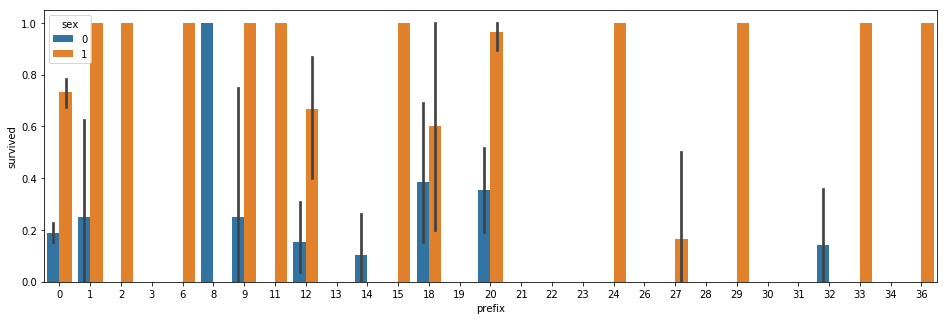

In [84]:
adults = test[test.age > 1]
kids = test[test.age <= 1]
plt.figure(figsize=(16, 5))
sns.barplot(x=test.prefix, y=test.survived, hue=test.sex)